![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – 
</div>

# - Electrochimie & Thermochimie - Etude d'une pile
> Physique Chimie `CPGE PT` lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/info-pyhton.html </a>
    >> Sujet inspiré par diverses lectures. Un grand merci à leurs contributeurs.trices

Dans ce notebook, on cherchera à `faire le lien entre la tension à vide d'une pile et son enthalpie libre standard de réaction` $\Delta_r G^o$. On étudiera, sur la base de mesures expérimentales fournies, `l'évolution de `$\Delta_r G^o$ `en fonction de la température` pour en déduire des grandeurs thermodynamiques de la réaction. On utilisera la `méthode de Monte Carlo` pour simuler un processus aléatoire et proposer des valeurs de $\Delta_r S^o$ et $\Delta_r H^o$

# Hypothèses
>On étudie la pile zinc-fer suivante :
$$Zn_{(s)}/(Zn^{2+}\!,SO_4^{2-})//(4K^+\!,[Fe(CN)_6]^{4-}),(3K^+\!,[Fe(CN)_6]^{3-})/Pt_{(s)}$$
avec des concentrations de 1,0 mol$^{-1}$ en sulfate de zinc et de 0,050 mol$^{-1}$ en hexacyanoferrate (II) de potassium et en hexacyanoferrate (III) de potassium.

# Résultats des mesures
>Voici les valeurs de températures ${T}$ en Celcius 
>>[22.6, 25.8, 30.0, 34.8, 39.9, 45.6, 49.6, 55.1, 60, 65.1, 69.8 ] 

>et les tensions à vide ${U}$ correspondantes de la pile en Volt 
>>[1.207, 1.201, 1.192, 1.181, 1.170, 1.155, 1.146, 1.133, 1.121,1.109, 1.095]


# Etude théorique

> **Question 1**
>
> Ecrire les deux demi-équations électrochimiques mises en jeu : $Zn^{2+}/Zn_{(s)}$ et $[Fe(CN)_6]^{3-}/[Fe(CN)_6]^{4-}$

>**Question 2** 
> Exprimer les potentiels d'électrode des deux demi-piles pour une température T quelconque. On attribuera l'`indice 2 à l'électrode de Platine qui plonge dans la solution d'ions hexacyanoferrate` et l'`indice 1 à l'électrode de zinc`. Rappel : concentrations de 1,0 mol$^{-1}$ en sulfate de zinc et de 0,050 mol$^{-1}$ en hexacyanoferrate (II) de potassium et en hexacyanoferrate (III) de potassium.

>**Question 3** 
> On constate que $E_2>E_1$.
>> 3.1) Quel est le pôle positif de la pile ?

>> 3.2) Faire un schéma de la pile

>> 3.3) Ecrire l'équation-bilan de la réaction

>> 3.4) Exprimer $\Delta_r G^o$ l'enthalpie libre standard de la réaction en fonction des potentiels standards $E_0^1$ et $E_0^2$ puis en fonction de la tension à vide $U$.

## Représentation des résultats expérimentaux
On cherche à tracer $\Delta_r G^o(T)$.
Une précision de 1°C a été choisie pour les mesures de $T$, de 7mV pour $U$

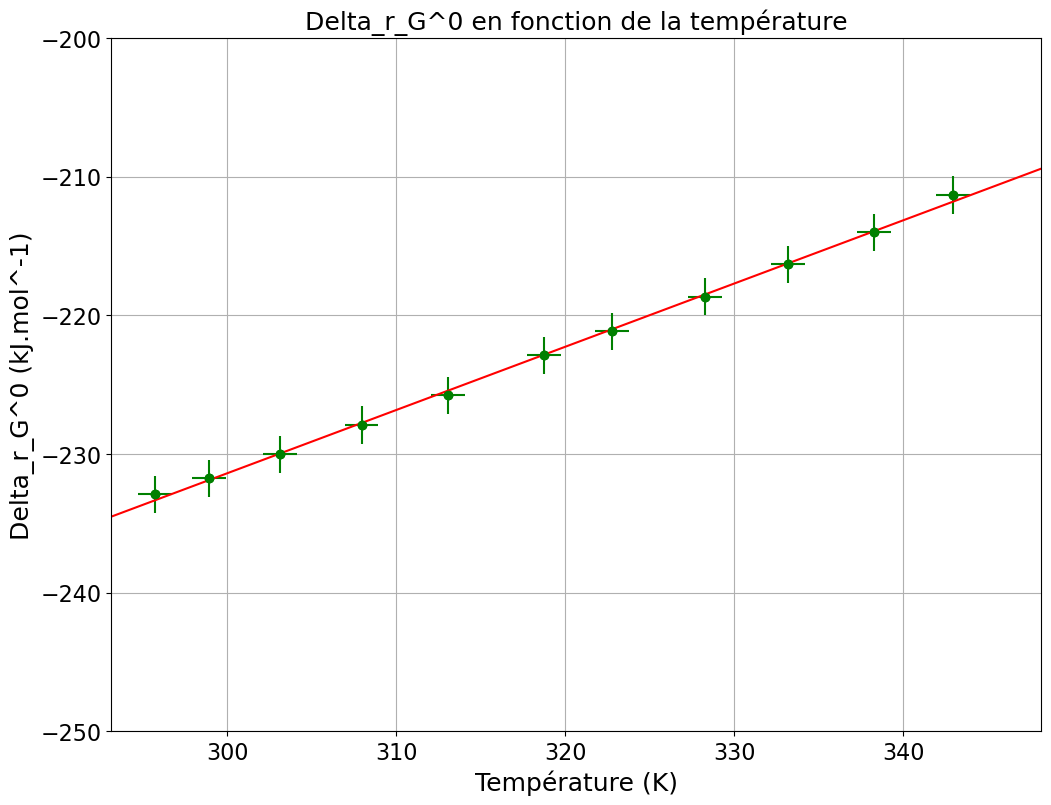

In [2]:
import numpy as np                     #importer numpy 
import matplotlib.pyplot as plt        #représentations graphiques

#mesures de température
temperature_Celius = np.array([22.6, 25.8, 30.0, 34.8, 39.9, 45.6, 49.6, 55.1, 60, 65.1, 69.8 ])
temperature_Kelvin = temperature_Celius + 273.15
Prec_temperature = np.array([1 for i in range(len(temperature_Kelvin))]) #Précision sur T en degré

#tension à vide
tension_vide  =  np.array([1.207, 1.201, 1.192, 1.181, 1.170, 1.155, 1.146, 1.133, 1.121,
                           1.109, 1.095])
Prec_tension_vide = 0.007  #Précision sur U en Volt

#enthlapie libre standard de réaction 
F = 96485     #constante de Faraday en C.mol-1
Delta_r_G_0 = -2*F*tension_vide/1e3             #Delta_r_G_0 en kJ.mol-1
Prec_Delta_r_G_0 = 2*F*Prec_tension_vide/1e3    #Précision sur Delta_r_G_0 en kJ.mol-1

#régression linéaire en utilisant la fonction polyfit de la bibliothèque numpy
par = np.polyfit(temperature_Kelvin,Delta_r_G_0,1)
temperature_fit = np.linspace(20+273.15,75+273.15,500);
ajustement = par[0]*temperature_fit + par[1]

#tracé
plt.figure(1, figsize=(12, 9))
plt.plot(temperature_Kelvin,Delta_r_G_0,'go')
plt.errorbar(temperature_Kelvin,Delta_r_G_0,xerr=Prec_temperature,
             yerr=Prec_Delta_r_G_0, fmt='go')
plt.plot(temperature_fit,ajustement,'r')
plt.xlabel('Température (K)',fontsize=18) 
plt.xlim(20+273.15,75+273.15)
plt.ylabel('Delta_r_G^0 (kJ.mol^-1)',fontsize=18) 
plt.ylim(-250,-200)
plt.title('Delta_r_G^0 en fonction de la température',fontsize=18)
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.show()

Analyse : D'après le cours $\Delta_r G^o(T) = \Delta_r H^o(T) - T \Delta_r S^o(T)$. L'intervalle de température étant "peu étendu" et comme aucune espèce ne subit de changement d'état au sein de cet intervalle, on peut faire l'approximation d'Ellingham et considérer que $\Delta_r H^o(T)$ et $\Delta_r S^o(T)$ ne dépendent pas de $T$. D'où le choix d'un modèle affine entre $\Delta_r G^o$ et $T$ : $\Delta_r G^o(T) = \Delta_r H^o - T \Delta_r S^o$
L'ordonnée à l'origine correspond à $\Delta_r H^o$ et l'opposé de la pente correspond à $\Delta_r S^o$.

## Analyse des résultats expérimentaux
>**Question 4** 
Compléter le programme ci-après qui permet de déterminer les mesures de $\Delta_r H^o$ et de $\Delta_r S^o$. 

Comme le nombre de mesures est relativement important, les lois de probabilité associées à $\Delta_r H^o$ et $\Delta_r S^o$ sont proches de la loi normale (cf histogrammes). On utilisera donc la méthode de Monte Carlo. 

In [ ]:
import numpy.random as rd

#nombre d'iterations pour les tirages aléatoires  
N=50000

#préparation des listes
a_alea = [];
b_alea = [];

#boucle
for i in range(N):
    #tirages aléatoires
    temperature_Kelvin_alea=temperature_Kelvin+Prec_temperature*rd.uniform(-1,1,len(temperature_Kelvin))
    tension_vide_alea=tension_vide+Prec_tension_vide*rd.uniform(-1,1,len(tension_vide)) #U_V en V
    Delta_r_G_0_alea = -2*F*tension_vide_alea             #Delta_r_G_0 en J.mol^-1
    #régression affine
    par_alea = np.polyfit(temperature_Kelvin_alea,Delta_r_G_0_alea,1) 
    
    #stockage des paramètres du modèle affine
    
## A COMPLETER    a_alea.append(par_alea[.....])        #-Delta_r S^o en J.K^-1.mol^-1

## A COMPLETER    b_alea.append(par_alea[.....]/1e3)    #Delta_r H^o en kJ.mol^-1

#calcul et affichage de la valeur moyenne et de l'écart-type des parmètres d'ajustement
moy_a = np.mean(a_alea)  
ecart_type_a = np.std(a_alea,ddof=1) 
print('moy_a =',np.around(moy_a,4))
print('écart-type_a =',np.around(ecart_type_a,4))
moy_b = np.mean(b_alea)  
ecart_type_b = np.std(b_alea,ddof=1) 
print('moy_b =',np.around(moy_b,4))
print('écart-type_b =',np.around(ecart_type_b,4))

#tracé histogramme du paramètre a
plt.figure(2, figsize=(12, 9))
plt.hist(a_alea, bins = np.linspace(400,500,100), edgecolor='k')
plt.xlabel('Paramètre a',fontsize=18) 
plt.ylabel('Fréquence',fontsize=18) 
plt.title('Fréquence des réalisations du paramètre a',fontsize=18)
plt.tick_params(axis='both',labelsize=16)
plt.show()

#tracé histogramme du paramètre b
plt.figure(2, figsize=(12, 9))
plt.hist(b_alea, bins = np.linspace(-400,-330,100), edgecolor='k')
plt.xlabel('Paramètre b',fontsize=18) 
plt.ylabel('Fréquence',fontsize=18) 
plt.title('Fréquence des réalisations du paramètre b',fontsize=18)
plt.tick_params(axis='both',labelsize=16)
plt.show()

# Conclusion
>**Question 4**
> Exploiter les résultats retournés pour déterminer des mesures de ces deux grandeurs avec un niveau de confiance de 95%. $\Delta_r H^o$ et $\Delta_r S^o$.
> Vous devriez trouver : 

>$\Delta_r H^o = -368  $ +/- $  10 kJ.mol^-1$ 

>$\Delta_r S^o = -456 $ +/- $ 31 J.K^-1.mol^-1$


>**Question 5**
>Proposer un programme permettant de tracer, en fonction de la température, la constante d'équilibre $K^o$ de la réaction associée à la pile. On donne la constante des gaz parfaits $R$=8,314 J.K$^{-1}$.mol$^{-1}$.

In [ ]:
#Constante d'équilibre
R = 8.314        #constante des gaz parfaits en J.K-1.mol-1
## A COMPLETER   K_0 = ....................

#tracé
plt.figure(2, figsize=(12, 9))
plt.plot(temperature_Kelvin,K_0,'go')
plt.xlabel('Température (K)',fontsize=18) 
plt.xlim(20+273.15,70+273.15)
plt.ylabel('K^0',fontsize=18) 

plt.title('Constante d'' équilibre en fonction de la température',fontsize=18)
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.show()